In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera

## Modèle

Soit un graphe de voisinage composé de n nœuds, et sa matrice d'adjacence A.
Initialement, les agents sont placés aléatoirement sur un espace de 2 dimensions. 
Pour se déplacer, chaque agent utilise la matrice de communication qui découle de la matrice d'adajacence. 
Les agents doivent se rencontrer dans la même zone si après.
 
La formule de déplacement des agents à la (k+1) ème itération:
 
 $$
\begin{aligned}
&v_{i}[k+1]=v_{i}[k]+\sum_{j=1}^{N} c_{i j}\left(v_{j}[k]-v_{i}[k]\right)\\
\end{aligned}
$$

$$
\begin{aligned}
&X=\left(x_{i}\right)_{1 \leqslant i<N}\text { ensemble des abscisses des agents  }\\
&Y=\left(y_{i}\right)_{1 \leqslant i<N}\text { ensemble des ordonnées des agents  }\\ 
\end{aligned}
$$

$$
 V=\left(v_{i}\right)_{1 \leqslant i\leqslant N} = 
\begin{bmatrix}
x_{i} \\
y_{i} 
\end{bmatrix}
\\
$$

$$
\mathbf{A} =
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1N} \\
a_{21} & a_{22} & \cdots & a_{2N} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N1} & a_{N2} & \cdots & a_{NN}
\end{bmatrix} =
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1N} \\
a_{21} & a_{22} & \cdots & a_{2N} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{NN}
\end{pmatrix}\text { Matrice d'adjacence }\\
$$

Avec :


$$
a_{i j}=\left\{\begin{array}{ll}
1  & \text { ; si j voisin de i } \\
0  & \text { ; sinon } \\
0  &  \text { ; si i=j} \\
\end{array}\right.
$$

$$
{\sum_{j=1}^{N} a_{i j}} \neq 0 \text {   càd aucun agent n'est isolé }
$$

$$
C=\left(c_{i j}\right)_{1 \leqslant i \leqslant N,1 \leqslant j \leqslant N}=\left(\frac{a_{i j}}{\sum_{j=1}^{N} a_{i j}}\right)_{1 \leqslant i \leqslant N,1 \leqslant j \leqslant N}\text { Matrice de communication }\\
$$


In [14]:
n = 12 #nb des noeuds
k = 20  #nb des itérations


a = 40 #longueur de l'espace
b = 30 #largeur de l'espace

r_det = ( ((a**2+b**2)**(1/2))/5 )*2 #rayon de détection
r_sec = r_det/3  #rayon de sécurité

print(r_det)

20.0


## Mouvement

Si la distance calculer à l'aide de la formule du concensus dépasse le rayon de sécurité, l'agent en question fait un pas de longueur égale au rayon de sécurité

On a :
$$
\left\{\begin{array}{l}
\Delta x^{2}+\Delta y^{2}=r_{sec}^{2} \\
\tan (\alpha)=\frac{\Delta x}{\Delta y}
\end{array}\right.
$$

Ainsi:

$$
\left\{\begin{aligned}
\Delta x &=\frac{r_{\sec }}{\sqrt{1+\tan ^{2}(\alpha)}} \\
\Delta y &=\frac{r_{\sec } \times \tan (\alpha)}{\sqrt{1+\tan ^{2}(\alpha)}}
\end{aligned}\right.
$$

In [15]:
def random_adjacency_matrix(n):   
    matrix = [[random.randint(0, 1) for i in range(n)] for j in range(n)]

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    # If i is connected to j, j is connected to i
    for i in range(n):
        for j in range(n):
            matrix[j][i] = matrix[i][j]
    return matrix
    
def random_adjacency_matrix2(n):   
    matrix = [[1 for i in range(n)] for j in range(n)]

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0
        
    return matrix

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()

def mouvement1(x,y,C):    
    for i in range(n):
        x_tem1 = x[i]
        y_tem1 = y[i]
        
        for j in range(n):
            x_tem1 = x_tem1 + (x[j]-x[i] )*C[i][j] 
            y_tem1 = y_tem1 + (y[j]-y[i] )*C[i][j] 
            
            l = ((x_tem1 - x[i])**2 + (y_tem1 - y[i])**2)**(1/2)
            
            if l > r_sec:
                x[i] += (x_tem1 - x[i])*(r_sec/l)
                y[i] += (r_sec**2 - ((x_tem1 - x[i])*(r_sec/l))**2)**(1/2)
    return x,y

def mouvement(x,y,C):    
    for i in range(n):
        for j in range(n):
            if ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2) >= 2*r_sec:
                x[i] += (x[j]-x[i])*C[i][j]
                y[i] += (y[j]-y[i])*C[i][j]
    return x,y

def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


In [16]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

x = rnd.choice(np.arange(0., a, 1), size=n)
y = rnd.choice(np.arange(0., b, 1), size=n)


matrice d'adjacence :
 [[0 1 1 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 1]
 [1 1 1 0 0 1 1 0 1 1 0 1]
 [0 1 0 0 1 0 1 1 1 0 1 1]
 [0 0 0 1 1 1 0 1 1 1 1 1]
 [0 0 0 1 0 1 1 0 1 0 1 1]
 [0 0 0 1 1 1 1 1 0 0 1 1]
 [1 0 1 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 0 1 1 1 1 0 0 1]
 [0 0 0 1 1 1 1 1 1 1 1 0]]


 matrice de communication :
 [[0.         0.25       0.25       0.         0.25       0.
  0.         0.         0.         0.25       0.         0.        ]
 [0.33333333 0.         0.         0.         0.33333333 0.33333333
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.33333333 0.
  0.         0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.25       0.25       0.25       0.         0.         0.25      ]
 [0.125      0.125      0.125      0.         0.         0.125
  0.125      0.         0.125     

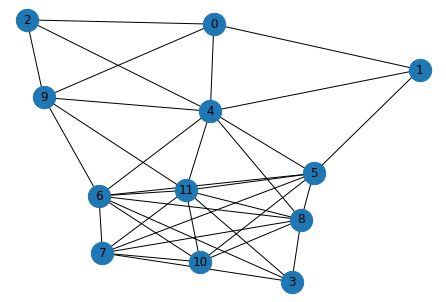

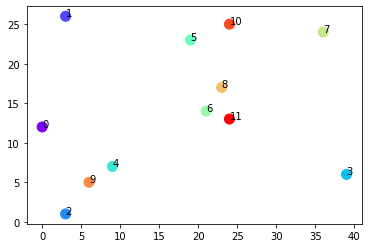

In [17]:
M = positionToAdjMatrix(x,y,r_det)

#affichage
a = np.array(M)
print("matrice d'adjacence :\n",a.reshape(n,n))

#matrice de communication
C = adjToCom(M)
print("\n\n matrice de communication :\n", C.reshape(n,n))

show_graph_with_labels(a)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(n):
    plt.annotate(i, (x[i], y[i]))

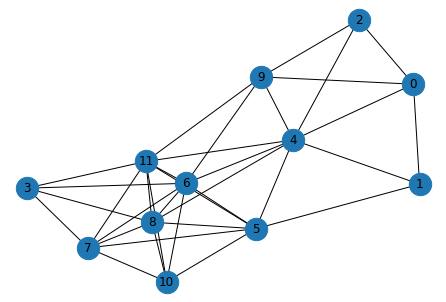

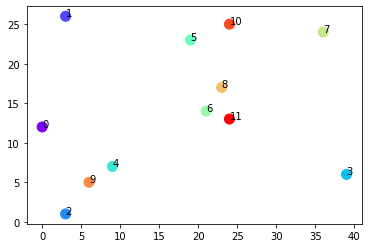

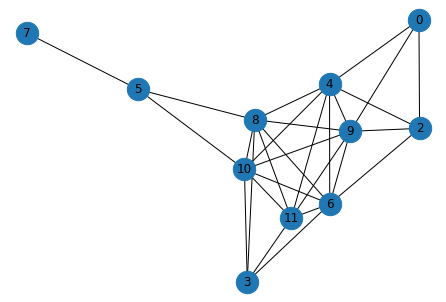

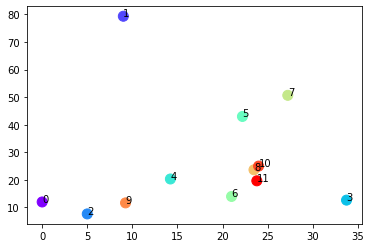

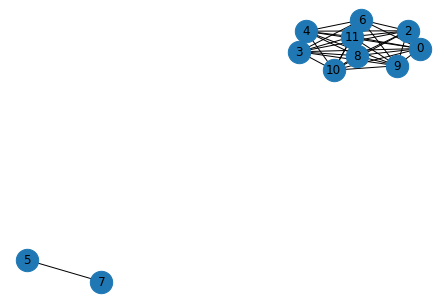

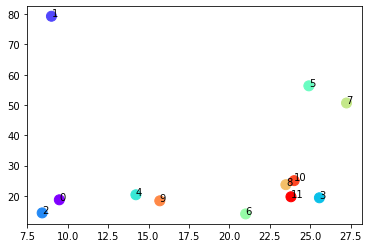

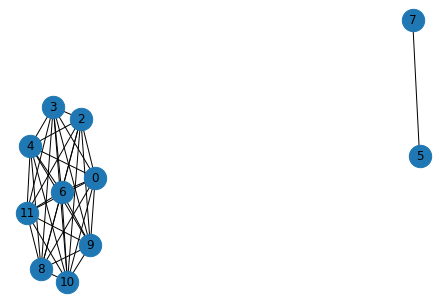

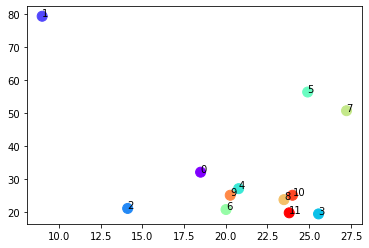

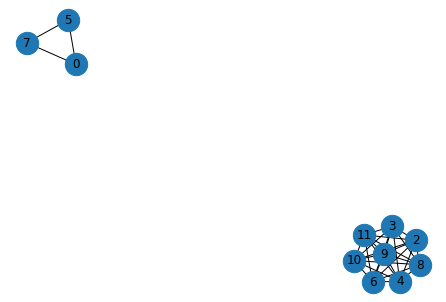

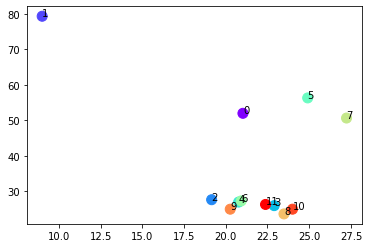

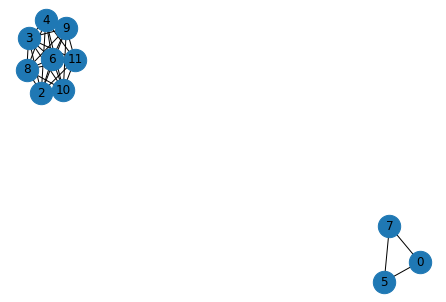

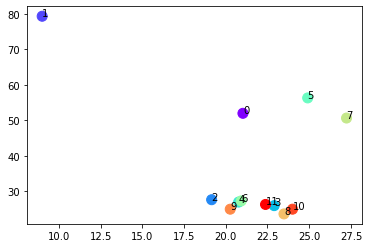

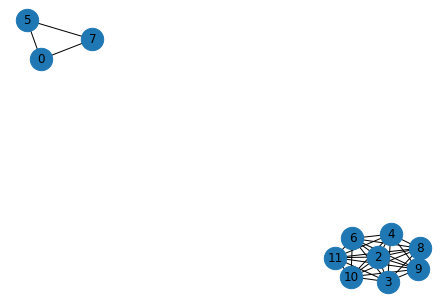

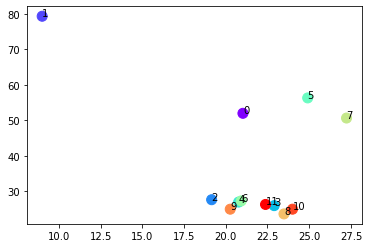

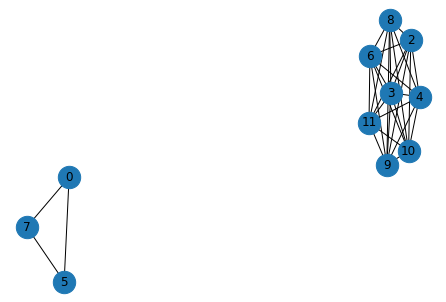

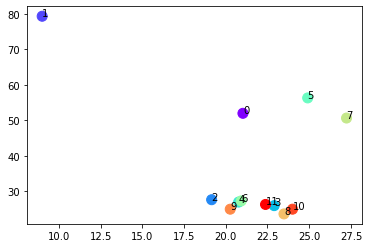

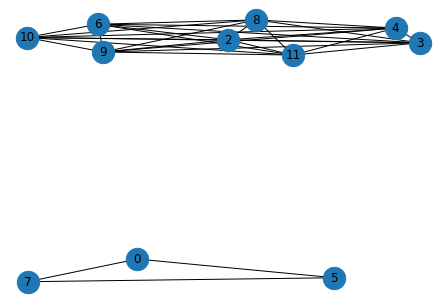

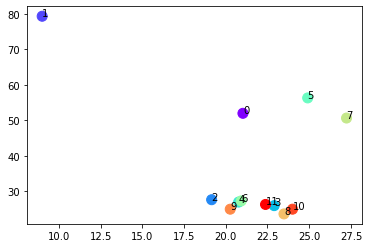

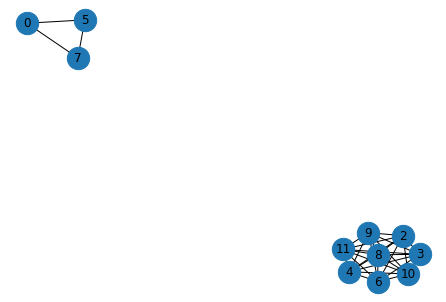

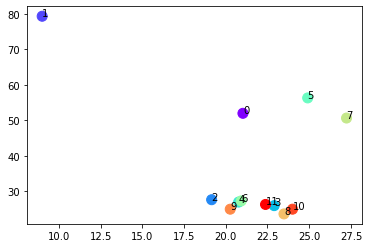

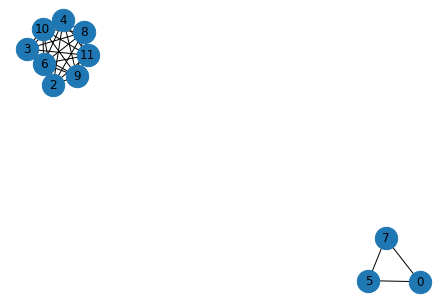

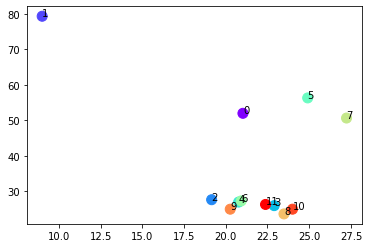

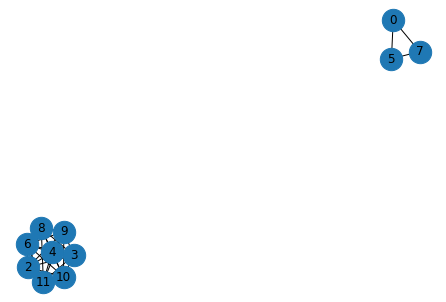

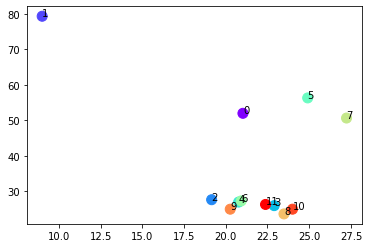

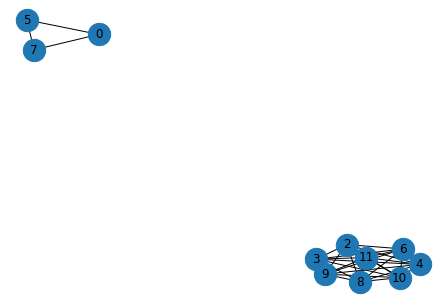

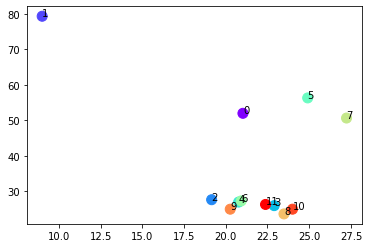

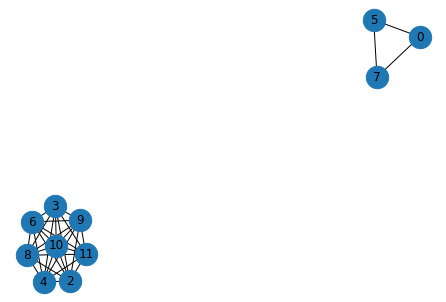

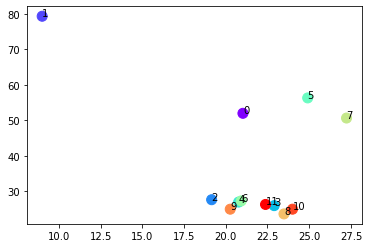

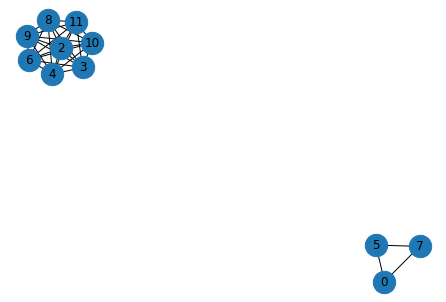

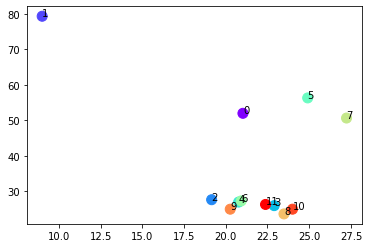

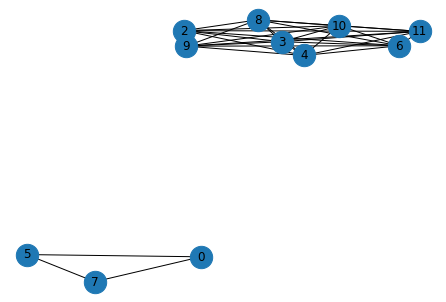

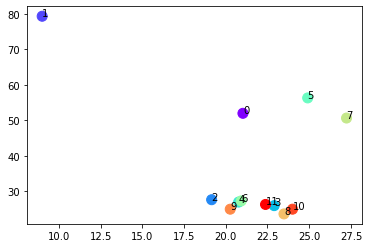

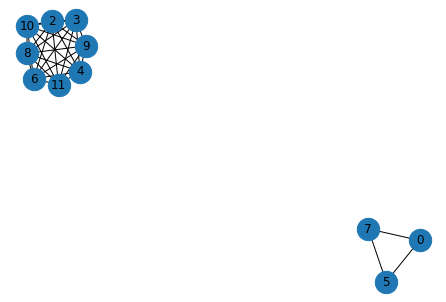

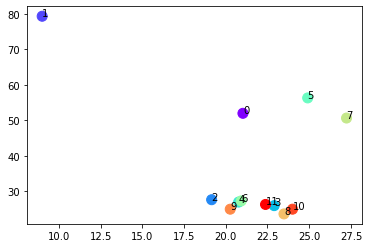

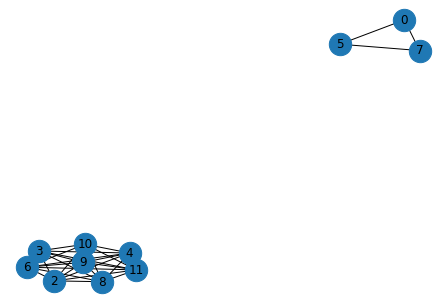

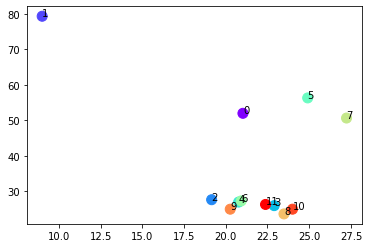

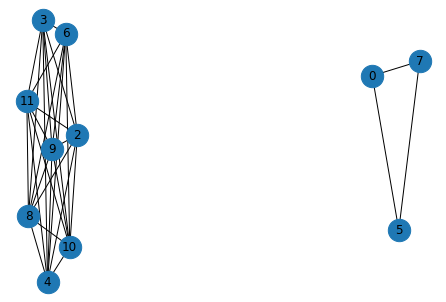

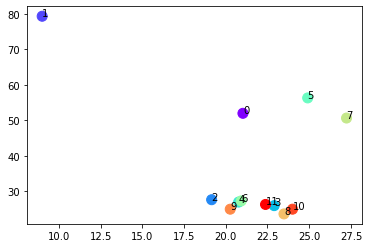

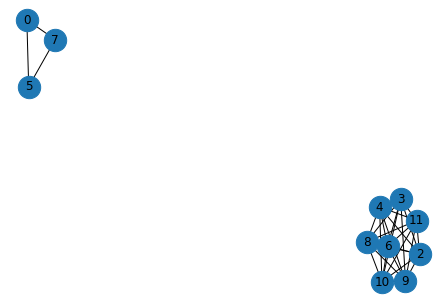

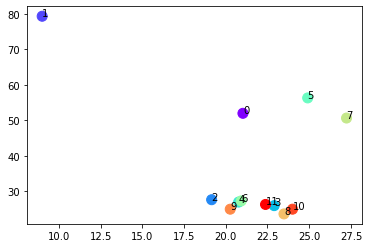

In [18]:
camera = Camera(plt.figure())

#main

for _ in range(k):
    
    M = positionToAdjMatrix(x,y,r_det)
    C = adjToCom(M)
    show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(n):
        plt.annotate(i, (x[i], y[i]))
        
    x,y = mouvement1(x,y,C)
    
    plt.pause(1.1)
    camera.snap()

anim = camera.animate(blit=True)
anim.save('rdv1.mp4')
